In [208]:
import numpy as np
import matplotlib.pyplot as plt

In [227]:
from importlib import reload

import clustering

clustering = reload(clustering)

from clustering import k_means, GaussiansMixtures, MeasureFunctions

### Generate a dataset

In [5]:
rand = np.random.RandomState(123)

# info about data
length = 500
cluster_count = 3
ndim = 2

cluster_X = []
cluster_y = []

for i, (x_off, y_off) in zip(range(cluster_count), [(0, 0), (20, 20), (30, 0)]):
    cluster_X.append(rand.normal((x_off, y_off), 4, (length, ndim)))
    cluster = np.zeros((length, cluster_count))
    cluster[:, i] = 1
    cluster_y.append(cluster)
    
X = np.concatenate(cluster_X)
y = np.concatenate(cluster_y)

shuffle_mask = np.arange(len(X))
np.random.shuffle(shuffle_mask)

X = X[shuffle_mask]
y = y[shuffle_mask]

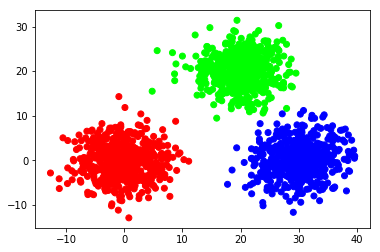

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y);

## Initialize and train k_means model

In [7]:
k_means_alg = k_means(cluster_count, 
                      MeasureFunctions.distances_measure)

In [8]:
k_means_alg.train(X)

k_means(n_clusters=3, simil_meas_func=<function MeasureFunctions.distances_measure at 0x7f2a0d207840>, similar_loss_value=1000, n_similar_loss=3, sample_nks=None, sample_nk_limits=(), mean_func=<function k_means.<lambda> at 0x7f2a0d207950>)

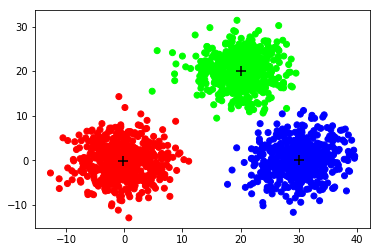

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(k_means_alg.nk[:, 0], k_means_alg.nk[:, 1], c='black', marker='+', s=100)
plt.show()

Plot **loss** history.

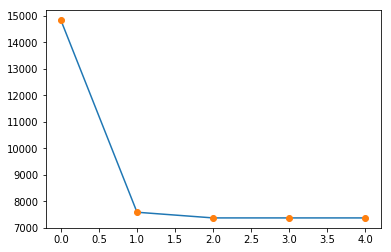

In [10]:
plt.plot(k_means_alg.loss_history)
plt.plot(k_means_alg.loss_history, 'o');

### Clustering with images

Load image.

In [11]:
pixels = plt.imread('resources/image.png')

Since image does not have x, y for every pixel, in which way the model expects it, create **nk** and pass them. 

Also do it for different cluster count values.

In [12]:
cluster_counts = [2, 4, 10]

k_means_models = []

for cluster_count in cluster_counts:
    sample_nks = np.random.uniform(pixels.min(), pixels.max(), 
                                  size=(cluster_count, pixels.shape[-1]))
    
    k_means_models.append(k_means(cluster_count, 
                                  MeasureFunctions.similar_color,
                                  sample_nks=sample_nks,
                                  mean_func=lambda x: x.mean(0).mean(0)
                                 ).train(pixels))

#### Plot loss history for model.
#### Predict probabilities for *r* with image pixels for different k values.

First model.

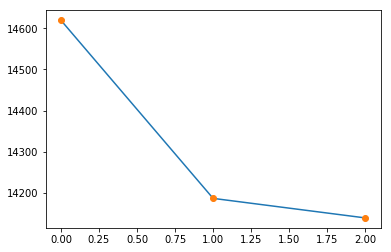

In [13]:
plt.plot(k_means_models[0].loss_history)
plt.plot(k_means_models[0].loss_history, 'o');

In [32]:
k_means_models[0].nk

array([[0.43581277, 0.17070276, 0.19965485],
       [0.62270218, 0.43387482, 0.41174144]])

In [33]:
new_pixels = np.array([
    [k_means_models[0].nk[np.argmax(pred)]
    for pred in k_means_models[0].predict(row)]
    for row in pixels
])

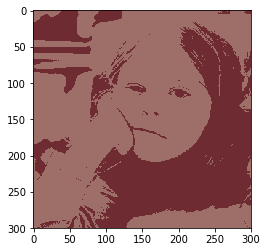

In [34]:
plt.imshow(new_pixels);

Second model.

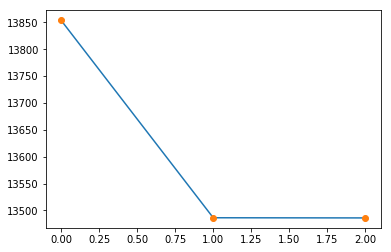

In [35]:
plt.plot(k_means_models[1].loss_history)
plt.plot(k_means_models[1].loss_history, 'o');

In [36]:
new_pixels = np.array([
    [k_means_models[1].nk[np.argmax(pred)]
    for pred in k_means_models[1].predict(row)]
    for row in pixels
])

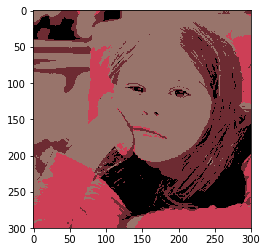

In [37]:
plt.imshow(new_pixels);

Third model.

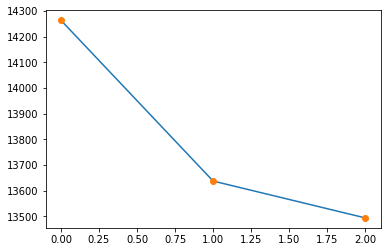

In [38]:
plt.plot(k_means_models[2].loss_history)
plt.plot(k_means_models[2].loss_history, 'o');

In [39]:
new_pixels = np.array([
    [k_means_models[2].nk[np.argmax(pred)]
    for pred in k_means_models[2].predict(row)]
    for row in pixels
])

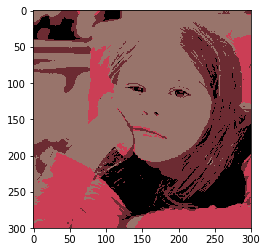

In [40]:
plt.imshow(new_pixels);

### Original image

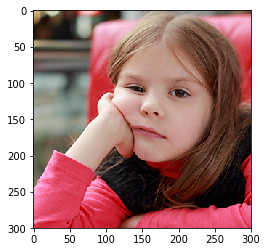

In [42]:
plt.imshow(pixels);

Generate a dataset for *gaussians mixtures*.

In [199]:
rand = np.random.RandomState(114)

# info about data
length = 500
cluster_count = 3

cluster_X = []
cluster_y = []

means = [[9, 8], 
         [6, 13], 
         [4, 7]]

covs = [[[.5, 1], [.25, 1]], 
        [[.5, -.5], [-.5, .1]], 
        [[0.25, 0.5], [-0.1, 0.5]]]

for i in range(cluster_count):
    cluster_X.append(rand.multivariate_normal(means[i], covs[i], length))
    cluster = np.zeros((length, cluster_count))
    cluster[:, i] = 1
    cluster_y.append(cluster)
    
X = np.concatenate(cluster_X)
y = np.concatenate(cluster_y)

shuffle_mask = np.arange(len(X))
np.random.shuffle(shuffle_mask)

X = X[shuffle_mask]
y = y[shuffle_mask]

/home/tigran/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: covariance is not symmetric positive-semidefinite.


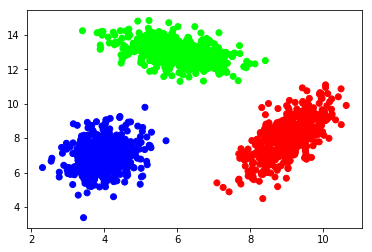

In [200]:
plt.scatter(X[:, 0], X[:, 1], c=y);

## Initialize and train gaussians mixtures

In [228]:
gaussians_mixtures = GaussiansMixtures(3, MeasureFunctions.distances_measure)
gaussians_mixtures.train(X)

iter


ValueError: operands could not be broadcast together with shapes (1500,) (1500,2) 

In [108]:
a = np.ones([3, 2])
b = np.array([[1, 2], [3, 4]])
b

array([[1, 2],
       [3, 4]])